# Exploratory Data Analysis

### Import Libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### Load Data

In [3]:
df = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')
print(df.head())

   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0   

### Check for missing values

### Check for missing values in each column

In [4]:
missing_summary = df.isnull().sum()

### Filter only columns that have missing values

In [5]:
missing_summary = missing_summary[missing_summary > 0]

### Display results

In [6]:
if missing_summary.empty:
    print("No missing values found (including placeholders).")
else:
    print("Missing values found:")
    print(missing_summary)

No missing values found (including placeholders).


### Fixing missing data

In this dataset there is no missing data, but if there was some missing data, below is the code to fix the dataset

### Define possible placeholders for missing data

In [8]:
missing_placeholders = ["NA", "N/A", "na", "n/a", "null", "NULL", "?", "", " ", "999"]

### Replace placeholders with NaN

In [9]:
df_cleaned = df.replace(missing_placeholders, pd.NA)

### Check for missing values in each column

In [10]:
missing_summary = df_cleaned.isnull().sum()

### Filter only columns that have missing values

In [11]:
missing_summary = missing_summary[missing_summary > 0]

### Display results 

In [12]:
if missing_summary.empty:
    print("No missing values found (including placeholders).")
else:
    print("Missing values found:")
    print(missing_summary)

No missing values found (including placeholders).


### Check for duplicate values and count

In [7]:
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows found: {duplicate_count}")

Duplicate rows found: 24206


### If I were to remove the duplicate rows, the code is below

In [14]:
df_cleaned = df.drop_duplicates()

## Check for impossible BMI values

### Check if BMI column exists and find impossible BMI values (<= 0 or > 100) and Display results

In [27]:
if 'BMI' in df.columns:
    impossible_bmi = df[(df["BMI"] <= 0) | (df["BMI"] > 100)]
    count = impossible_bmi.shape[0]
    if count > 0:
        print(f"Impossible BMI values found: {count}")
        print(impossible_bmi)
    else:
        print("No impossible BMI values found.")
else:
    print("BMI column not found in the dataset.")

No impossible BMI values found.


## Review column data types and formats

### 1. Review current data types

In [4]:
print("DataFrame Info:")
print(df.info())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-nul

In [5]:
print("\nData Types:")
print(df.dtypes)


Data Types:
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


### Check for incorrectly formatted values in each column

In [6]:
for col in df.columns:
    unique_vals = df[col].dropna().unique()   # drop NaN before checking
    try:
        # Try sorting (works for numbers & strings consistently)
        unique_vals_sorted = sorted(unique_vals)
    except Exception:
        # Fallback: keep as-is if mixed types can't be sorted
        unique_vals_sorted = unique_vals

    print(f"\n{col} - Unique values: {unique_vals_sorted}")


Diabetes_binary - Unique values: [np.float64(0.0), np.float64(1.0)]

HighBP - Unique values: [np.float64(0.0), np.float64(1.0)]

HighChol - Unique values: [np.float64(0.0), np.float64(1.0)]

CholCheck - Unique values: [np.float64(0.0), np.float64(1.0)]

BMI - Unique values: [np.float64(12.0), np.float64(13.0), np.float64(14.0), np.float64(15.0), np.float64(16.0), np.float64(17.0), np.float64(18.0), np.float64(19.0), np.float64(20.0), np.float64(21.0), np.float64(22.0), np.float64(23.0), np.float64(24.0), np.float64(25.0), np.float64(26.0), np.float64(27.0), np.float64(28.0), np.float64(29.0), np.float64(30.0), np.float64(31.0), np.float64(32.0), np.float64(33.0), np.float64(34.0), np.float64(35.0), np.float64(36.0), np.float64(37.0), np.float64(38.0), np.float64(39.0), np.float64(40.0), np.float64(41.0), np.float64(42.0), np.float64(43.0), np.float64(44.0), np.float64(45.0), np.float64(46.0), np.float64(47.0), np.float64(48.0), np.float64(49.0), np.float64(50.0), np.float64(51.0), np.

### For 'Diabetes_binary', expected values are 0, 1, 2

#### Expected values

In [7]:
expected_values = {0, 1, 2}

#### Unique actual values (ignoring NaN)

In [9]:
actual_values = set(df["Diabetes_binary"].dropna().unique())

#### Check for invalid values

In [12]:
invalid_values = actual_values - expected_values

print("Unique values in 'Diabetes_binary':", actual_values)

if invalid_values:
    print("⚠️ Unexpected values found:", invalid_values)
else:
    print("✅ All values are valid (0, 1, 2)")

Unique values in 'Diabetes_binary': {np.float64(0.0), np.float64(1.0)}
✅ All values are valid (0, 1, 2)


### Understand class balance of the target variable


Class balance:
 Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64


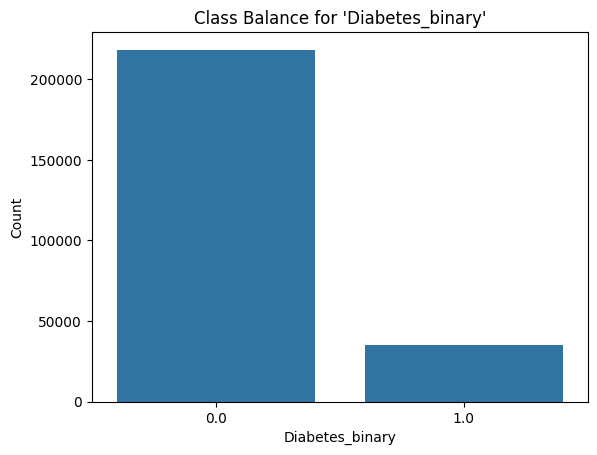

In [13]:
target_col = "Diabetes_binary"

if target_col in df:
    # Show class balance
    print("\nClass balance:\n", df[target_col].value_counts(normalize=False))

    # Plot class balance
    sns.countplot(data=df, x=target_col)
    plt.title(f"Class Balance for '{target_col}'")
    plt.xlabel(target_col)
    plt.ylabel("Count")
    plt.show()
else:
    print(f"⚠️ Column '{target_col}' not found in DataFrame")

### Visualize distributions, correlations, and feature-to-target patterns

In [14]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

#### Histograms for numerical features

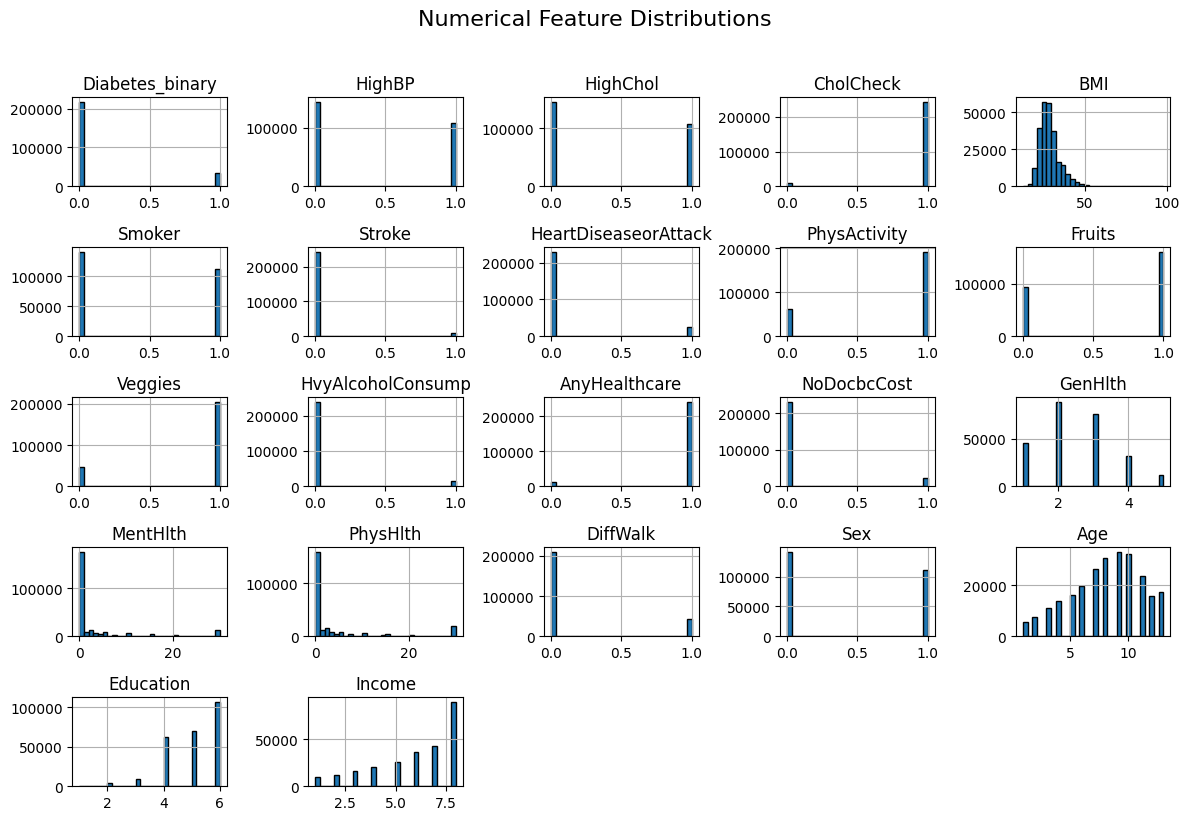

In [15]:
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
ax = df[num_cols].hist(
    figsize=(12, 8), 
    bins=30,          # finer bins (customizable)
    edgecolor="black" # clearer bar boundaries
)

plt.suptitle("Numerical Feature Distributions", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

#### Correlation heatmap

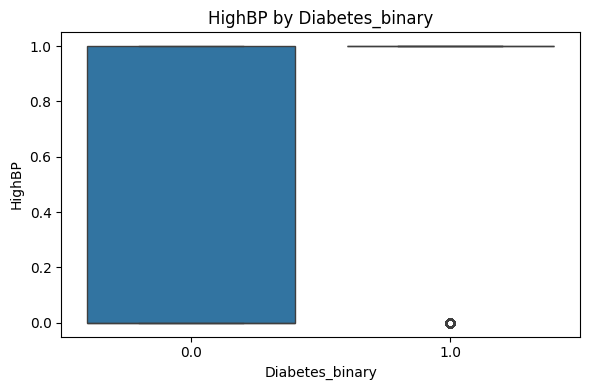

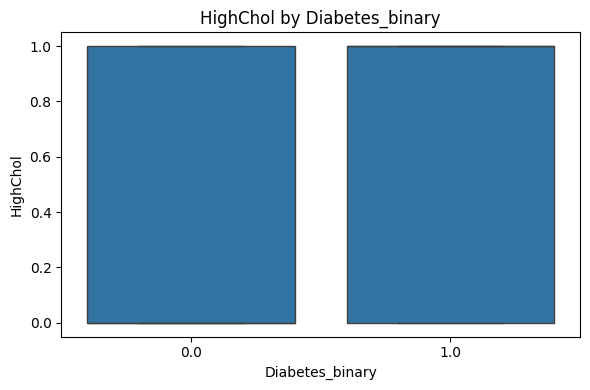

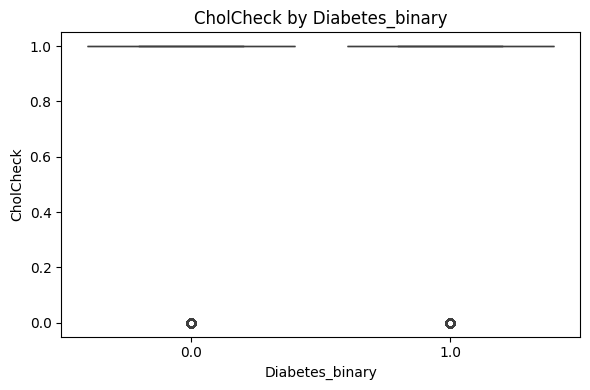

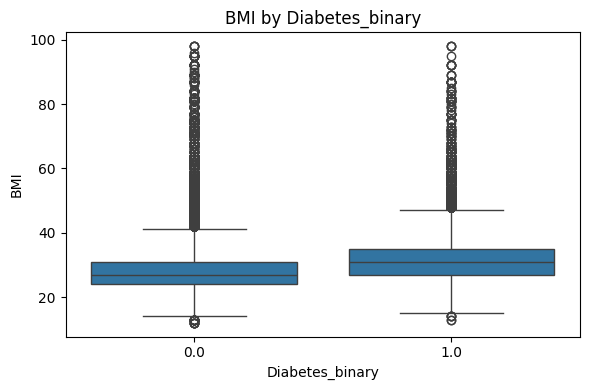

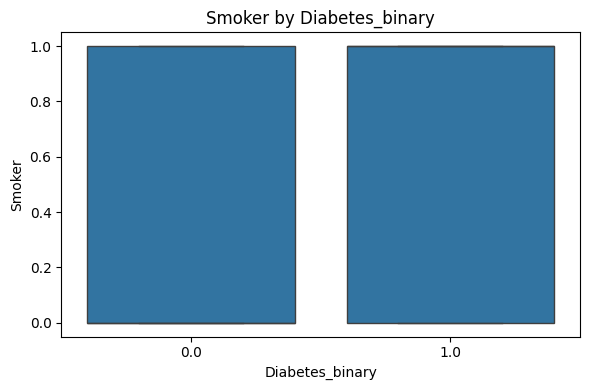

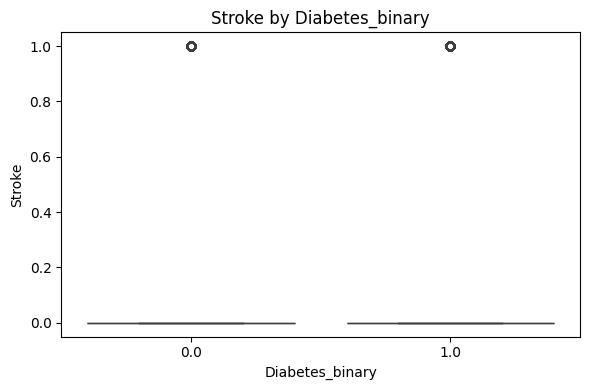

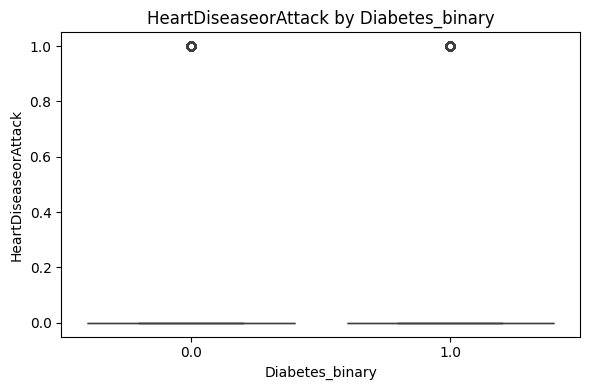

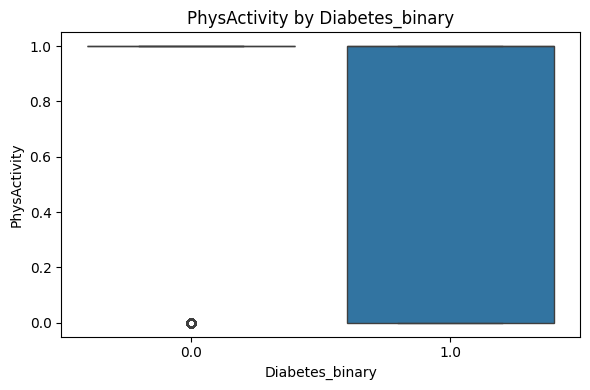

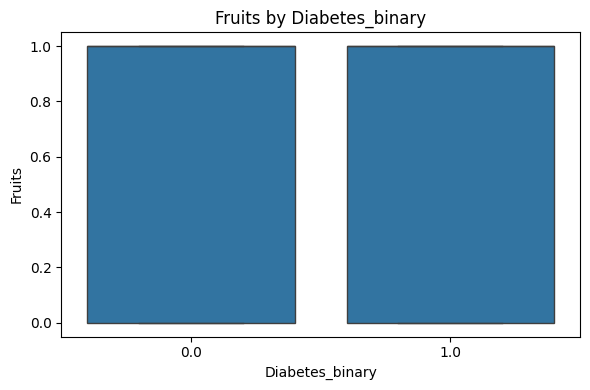

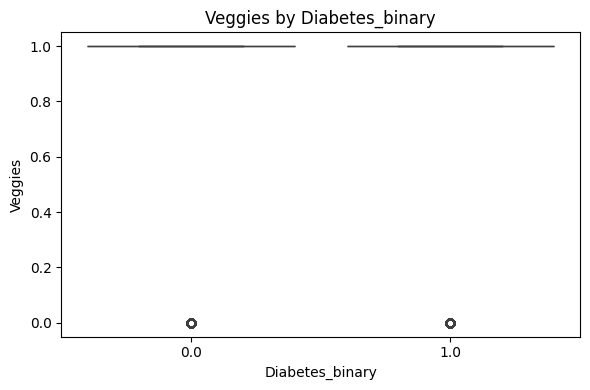

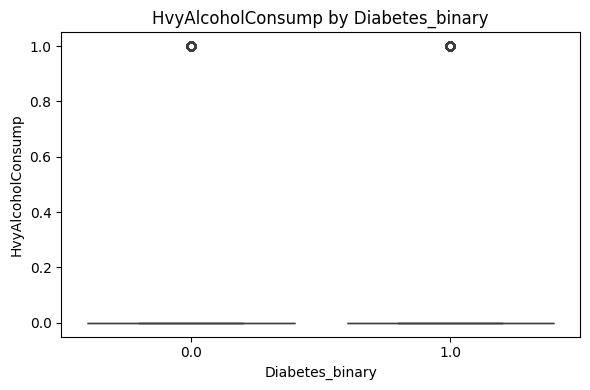

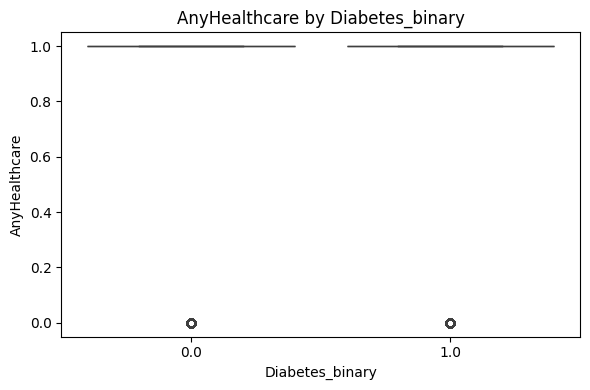

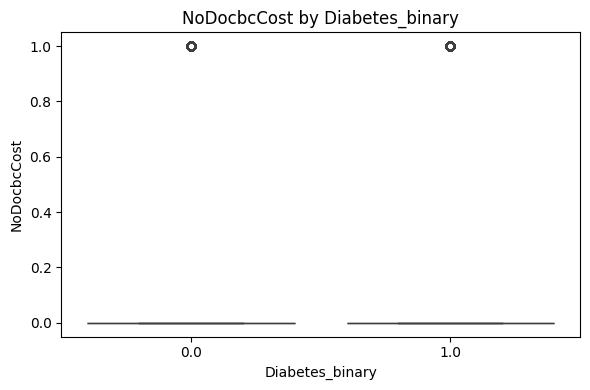

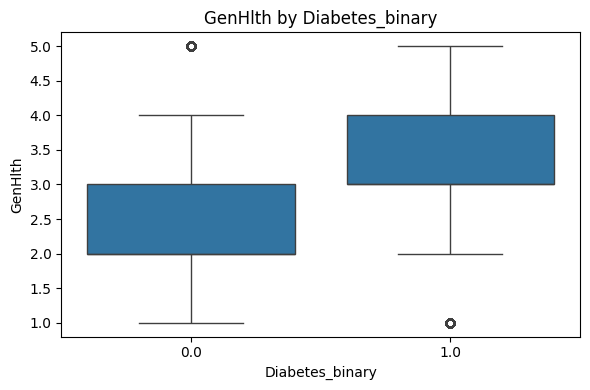

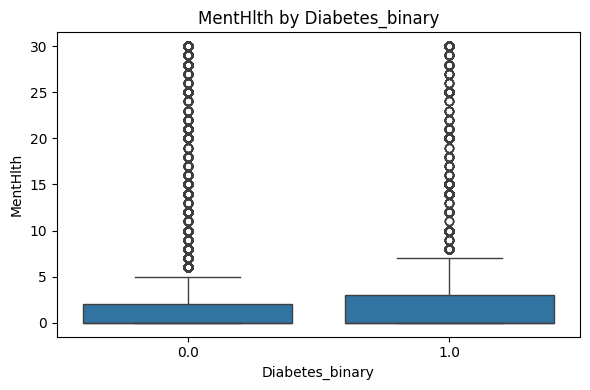

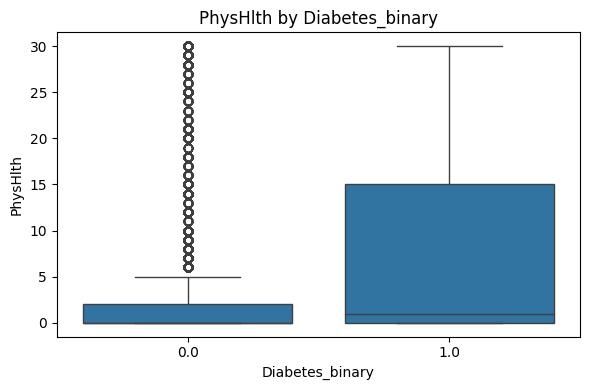

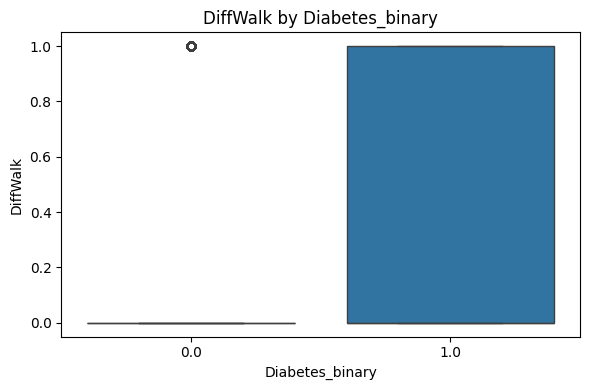

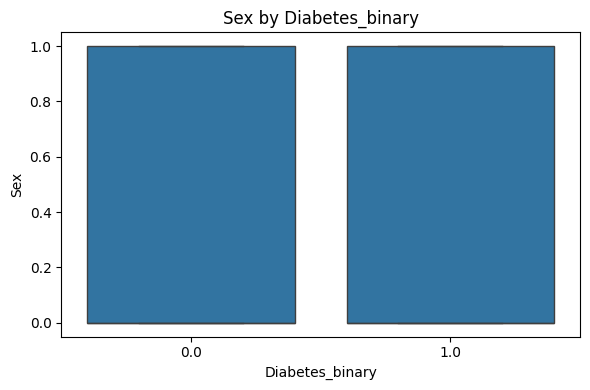

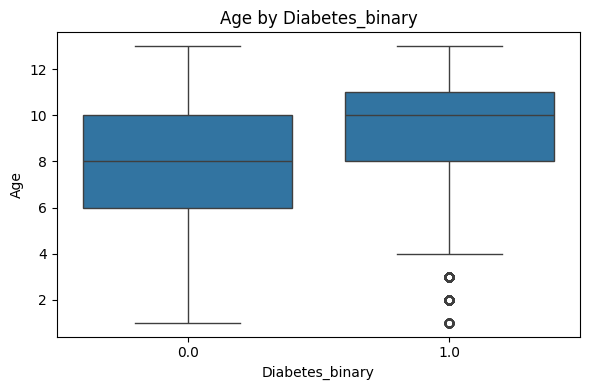

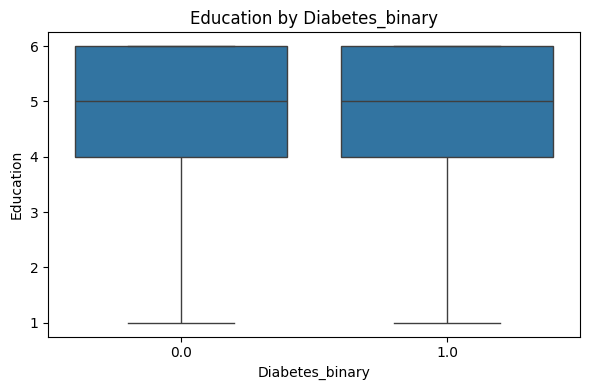

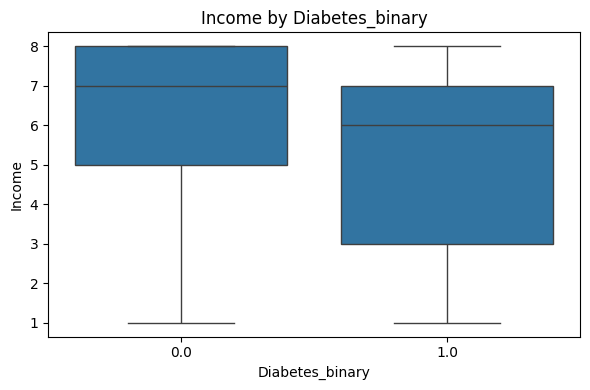

In [17]:
if target_col in df:
    for col in [c for c in num_cols if c != target_col]:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=target_col, y=col)
        plt.title(f"{col} by {target_col}")
        plt.tight_layout()
        plt.show()
else:
    print(f"⚠️ Column '{target_col}' not found in DataFrame")

#### Countplots for categorical features

In [20]:
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Exploratory data analysis

There was no missing or duplicate data found
Found no issues with data types and formating 

Class distribution

0.0 → No diabetes → 218,334 samples (~86%)

1.0 → Has diabetes → 35,346 samples (~14%)

Class imbalance

The dataset is highly imbalanced: the negative class (0) is much larger than the positive class (1).

Imbalance ratio ≈ 218,334 / 35,346 ≈ 6.2 : 1

Implications for modeling

Many ML algorithms (like logistic regression, decision trees) may bias toward the majority class.

Accuracy alone may be misleading because a naive model predicting all 0s would already be ~86% accurate.

Class balancing techniques to be considered:

Resampling: oversample minority class (SMOTE) or undersample majority class.

Class weights: make model pay more attention to rare but important cases.  
- A standard model tries to minimize overall errors, so it may predict 0 most of the time, because that gives high accuracy.
-  This is not ideal because the minority class (1) is clinically important.

- So using Class weight can help solve, we can use class_weights from scikit-learn.
  
Use metrics beyond accuracy: evaluate performance beyond accuracy, especially for minority class.
- In imbalanced datasets, accuracy can be misleading: Example: predicting all 0s gives 86% accuracy, but we will miss all diabetes cases.

